# Best-First search with tree search

Best-First (BF) search with tree search is not complete with an arbitrary evaluation function. See example below.

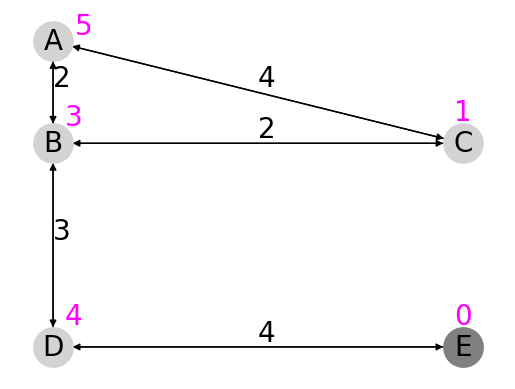

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','C','D'],'C':['A','B'],'D':['B','E'],'E':['D']}
W={('A','B'): 2, ('B','A'): 2, ('A', 'C'): 4, ('C','A'): 4, ('B', 'C'): 2, ('C', 'B'): 2, ('B', 'D'): 3, ('D', 'B'): 3, ('D','E'): 4, ('E','D'): 4}
h={"A": 5, "B": 3, "C": 1, "D": 4, "E": 0}
lab_h = {}
for i in h: lab_h[i] = str(h[i])
nxG=nx.DiGraph(G)
nx.set_edge_attributes(nxG, values = W, name = 'weight')
source='A'
Target=['E']
pos_nodes = {'A': (10, 300), 'B': (10, 200), 'C': (20, 200), 'D': (10, 0), 'E': (20, 0)}
pos_h = {'A': (10.75, 315), 'B': (10.5, 225), 'C': (20, 230), 'D': (10.5, 30), 'E': (20, 30)}
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=W,font_size=20,
  horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)
nx.draw_networkx_labels(nxG, pos_h, labels=lab_h, font_size=20, font_color="magenta")
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
nx.draw_networkx_nodes(nxG,pos=pos_nodes, nodelist=Target, node_color='gray', node_size=800)

## BF algorithm with tree search
BF(G, source, f)  
> Open = InitHeap(source,f(source))  
> while Open $\neq \emptyset$
>> s = Pop(Open)  
>> if Target(s) return s  
>> for n $\in$ Adjacents(G,s)  
>>>  $x = f_n$  
>>>  if n $\notin$ Open  
>>>>   Push(Open,n,$f_n$)  
>>>  else
>>>>   x = Open[n]  
>>>>   if $f_n$ < x
>>>>>   Update(Open,n,$f_n$)  
> return NULL

### BF search with tree search that goes into an infinite loop due to the evaluation function defined above

In [33]:
import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
# f is a evaluation function
def bf(G, W, source, Target, f):
  fn = f[source]
  Openh = []; heapq.heappush(Openh,(fn,source)); 
  Opend = {}; Opend[source] = fn
  while Openh != []:
    (fs,s) = heapq.heappop(Openh); del Opend[s]
    if s in Target:
      return s
    for n in G[s]:
      fn = f[n]
      if n not in Opend:
        heapq.heappush(Openh,(fn,n)); Opend.update({n: fn})
      else:
        ofn = Opend[n]
        # Existing node with better fn -> update
        if fn < ofn:
          Opend[n] = fn
          i = Openh.index((ofn,n))
          Openh[i] = (fn,n)
          heapq._siftdown(Openh,0,i)
          
# Greedy search as f = h          
print(bf(G,W,source,Target,h))

KeyboardInterrupt: 

### BF search graphically showing the infinite loop iterating over B and C nodes

StopIteration: 

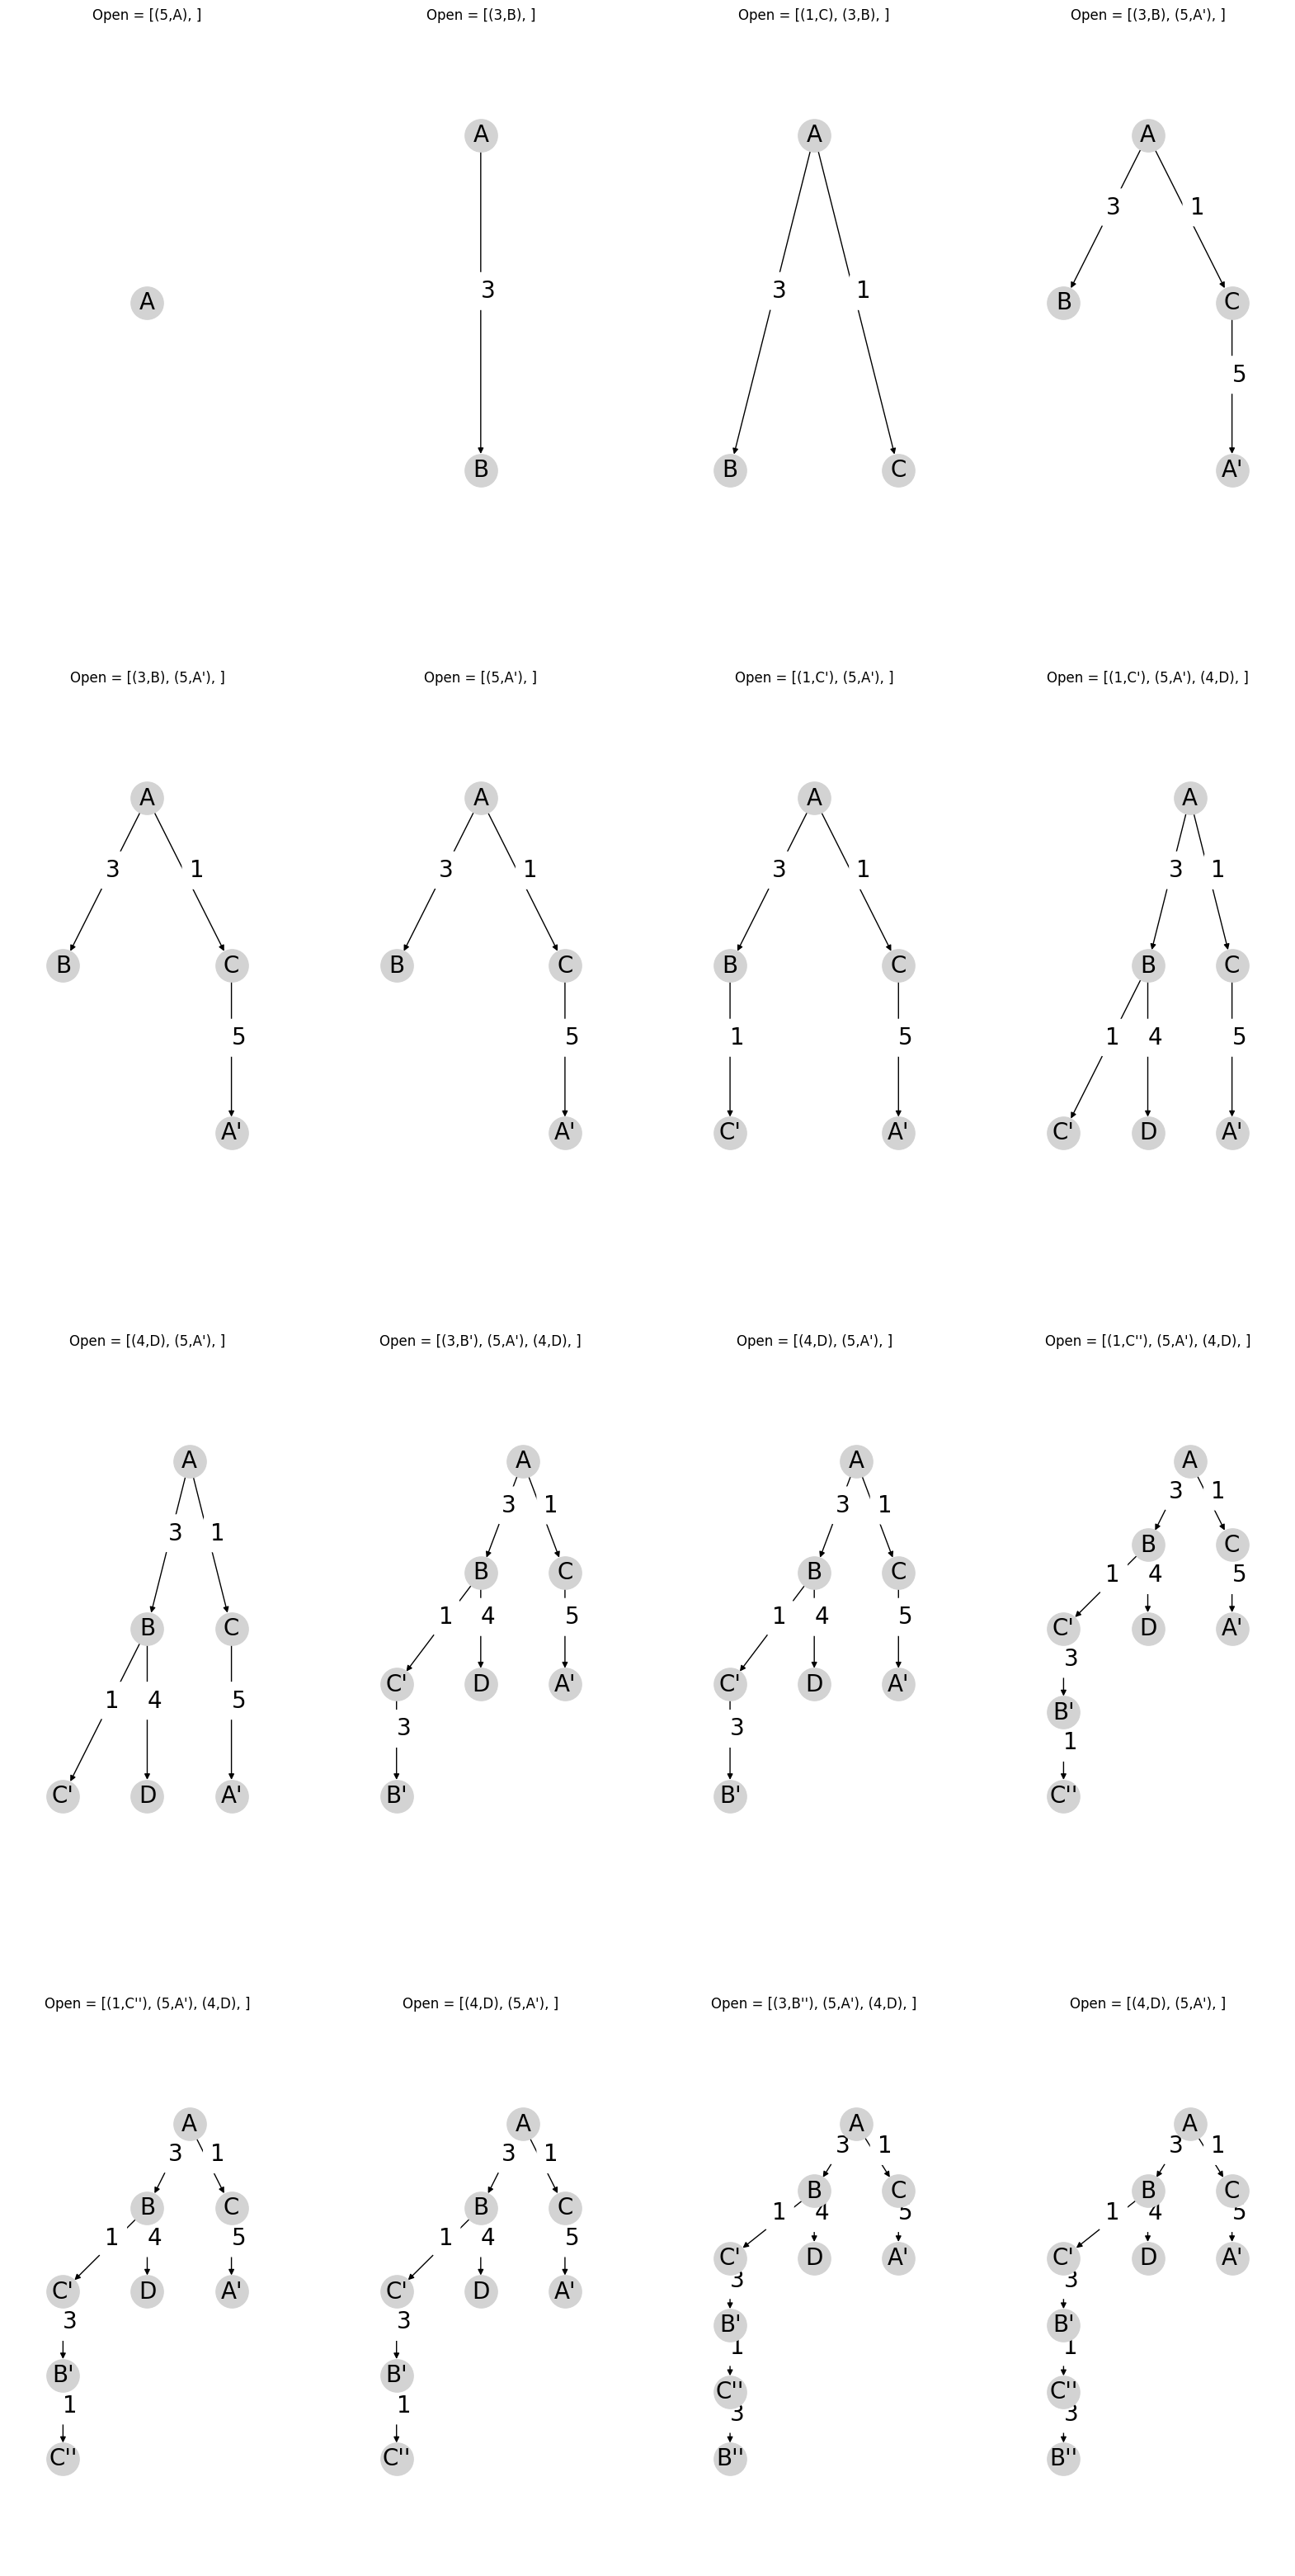

In [38]:
import matplotlib.pyplot as plt

nrows=4; ncols=4
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
axes = iter(fig.axes)

def draw_graph(DG, DW, source, Open, target=[]):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  ax.margins(0.25,0.25)
  title="Open = ["
  for (f,n) in Open:
    title += "(" + str(f) + "," + n + "), " 
  title += "]"
  ax.set_title(title) 
  #ax.set_title("Open = "+str(Open))
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG, prog='dot', root=source)
  nx.draw(nxDG, pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_edge_labels(nxDG, pos=pos_nodes, edge_labels=DW, label_pos=0.5, font_size=20, 
    horizontalalignment="left",verticalalignment="bottom", ax=ax, rotate=False)
  nx.draw_networkx_nodes(nxDG, pos=pos_nodes, nodelist=target, node_color='gray', node_size=800)

import heapq
# G is a graph represented as an adjancency list
# W is a dictionary that for each pair of nodes as a tuple returns their cost
# source is the label (string) of the source node
# target is the list of target nodes
def bfs(G, W, source, Target, f):
  fn = f[source]
  Openh = []; heapq.heappush(Openh,(fn,source)); 
  Opend = {}; Opend[source] = fn
  DG = {source:[]}
  DW = {}
  draw_graph(DG, DW, source, Openh)
  while Openh != []:
    (fs,s) = heapq.heappop(Openh); del Opend[s[0]]
    if s[0] in Target:
      draw_graph(DG, DW, source, Openh, [s])
      return s
    Adj = DG[s]
    for n in G[s[0]]:
      fn = f[n]
      if n not in Opend:
        Opend.update({n: fn})
        while n in DG: n+="'"
        heapq.heappush(Openh,(fn,n)); 
        Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):fn})
      else:
        ofn = Opend[n]
        # Existing node with better fn -> update
        if fn < ofn:
          Opend[n] = fn
          while n in DG: n+="'" 
          if len(n)>1: n=n[:-1]
          i = Openh.index((ofn,n))
          n+="'" 
          Openh[i] = (fn,n)
          heapq._siftdown(Openh,0,i)
          Adj.append(n); DG[s]=Adj; DG.update({n:[]}); DW.update({(s,n):fn})
      draw_graph(DG, DW, source, Openh)
          
print(bfs(G,W,source,Target,h))